In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Upload the dataset

In [3]:
data=pd.read_excel(r'C:\Users\SREELAKSHMI\Downloads\iris (2).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Handling Null values

In [12]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

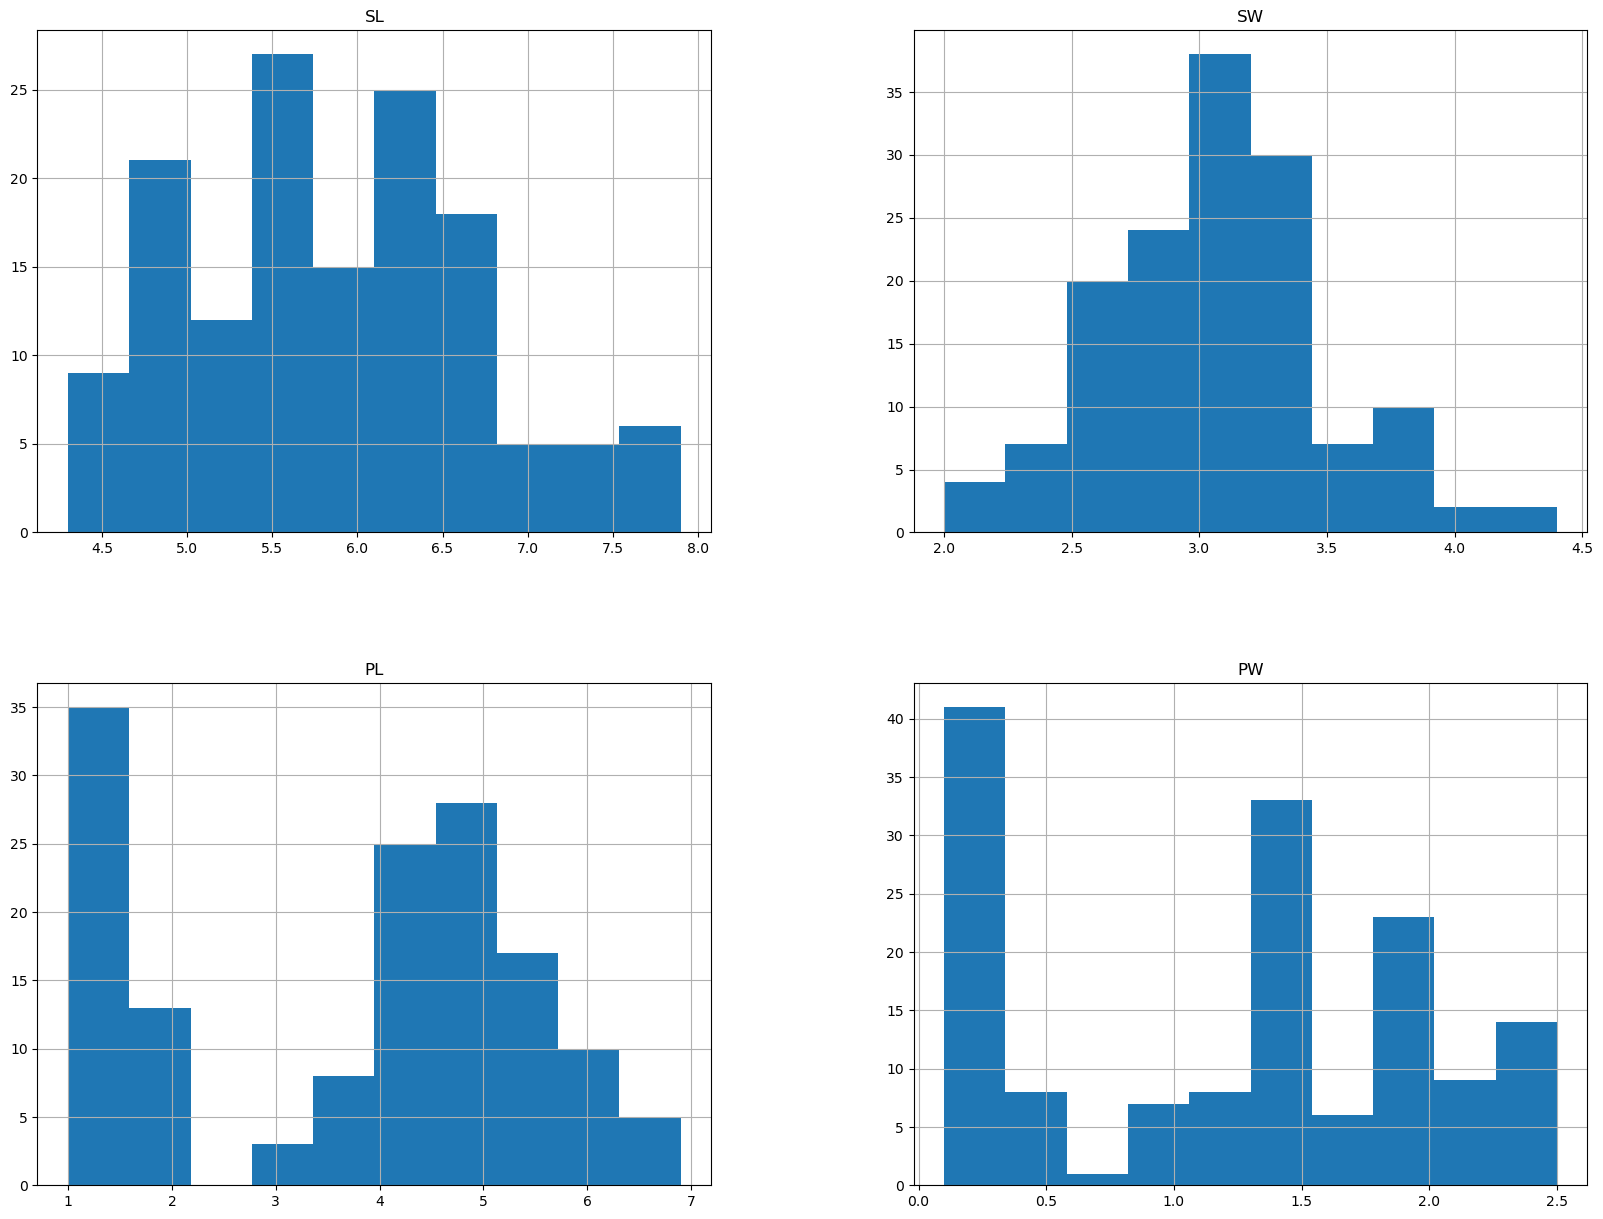

In [8]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [9]:
data['SL']=data['SL'].fillna(data['SL'].mean())

In [13]:
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [14]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Handling outliyers

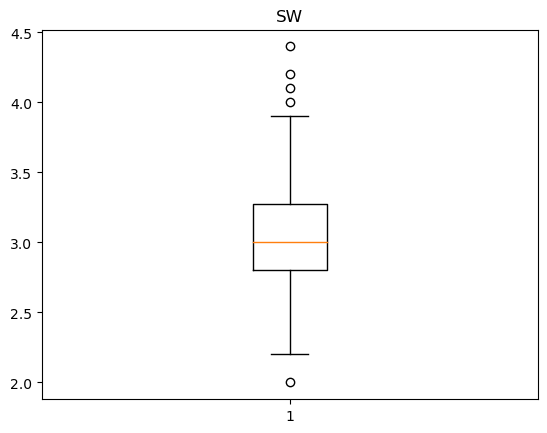

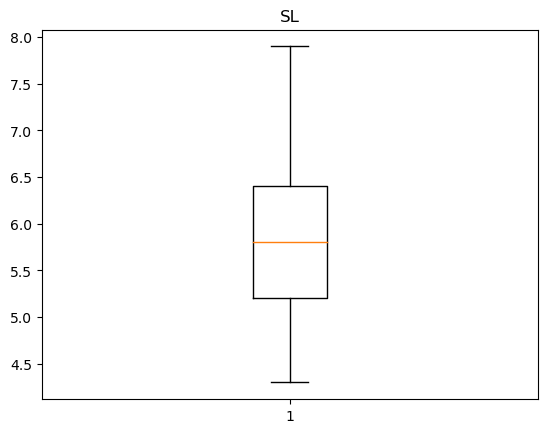

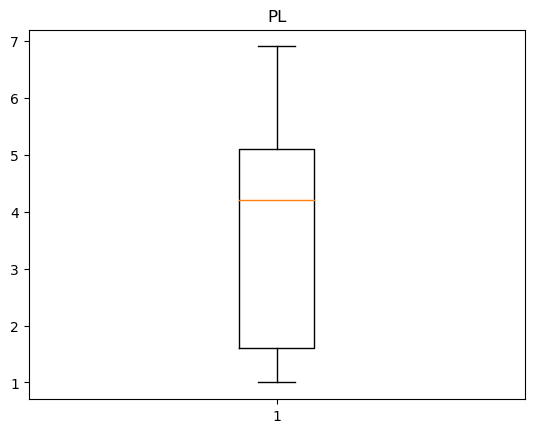

In [16]:
num_cols=['SW','SL','PL']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [17]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_19444\3273127858.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_19444\3273127858.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\SREELAKSHMI\AppData\Local\Temp\ipykernel_19444\3273127858.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lowe

In [18]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [19]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [20]:
data['SW'].median()

3.0

In [21]:
outliers=[]   #find outliers
for x in data['SW']:
    if(x>up_lim)or(x<low_lim):
        outliers.append(x)
outliers  

[4.0, 4.4, 4.1, 4.2, 2.0]

In [23]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
data.drop([14, 15, 32, 33 ],inplace=True)

# Modelling

In [25]:
## test - 30%
from sklearn.model_selection import train_test_split
# input data
X = data.drop(columns=['Classification'])
# output data
Y = data['Classification']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(x_train, y_train)

C:\Users\SREELAKSHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9772727272727273


In [29]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [31]:
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) )

Accuracy:  0.9772727272727273


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) )

Accuracy:  0.9545454545454546


# KNN classification model gives the best result